<a href="https://colab.research.google.com/github/aamir-ansari-44/Study/blob/main/Adv.%20Supervised%20Learning/gmm_sidhu__class_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Bivariate Normal Distribution [DEMO]: https://demonstrations.wolfram.com/TheBivariateNormalDistribution/

![](https://www.gstatic.com/education/formulas2/553212783/en/normal_distribution.svg)

![](https://miro.medium.com/v2/resize:fit:1200/1*6pEBC9ts_gYwup-NtmmNNQ.jpeg)

![](https://up-skill.me/wp-content/uploads/2019/09/Variance_Standard_Deviation.png)

- - -

Bayes Theorem:

![](https://www.gstatic.com/education/formulas2/553212783/en/bayes__theorem.svg)

- - -

Covaraiance Matrix:

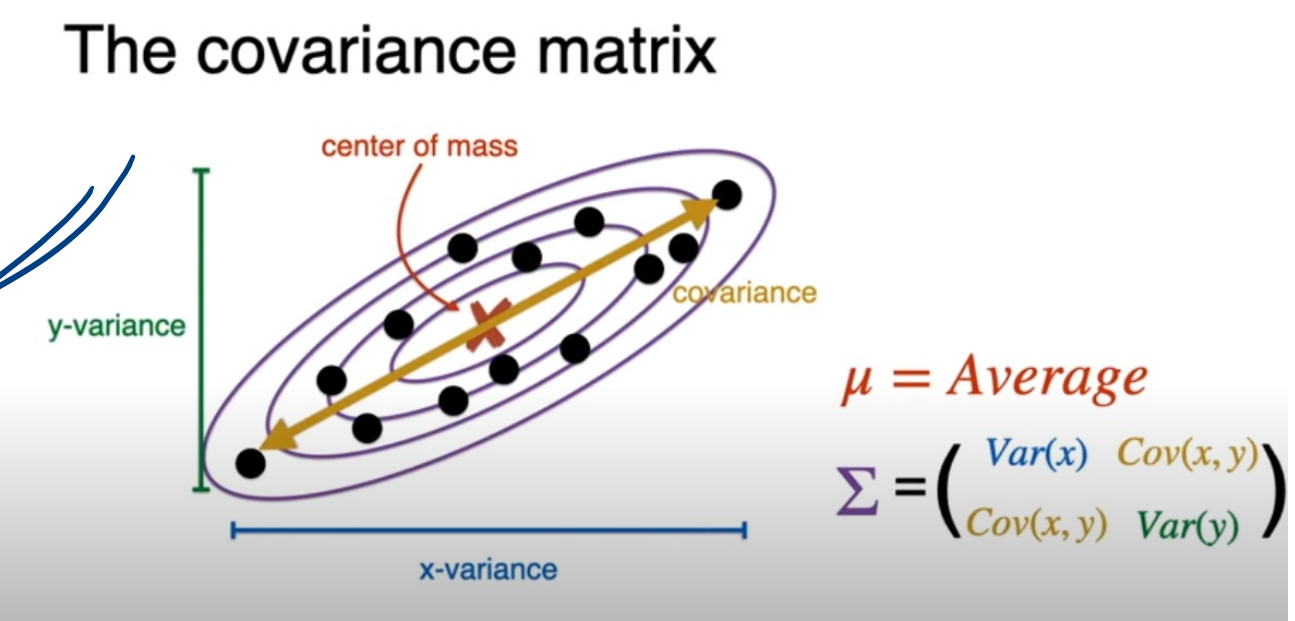



Video Link:

https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/016/181/original/ezgif-5-38f1772929_%281%29.mp4?1665485304

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2023-09-06 15:23:16--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 172.217.193.138, 172.217.193.113, 172.217.193.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.193.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vle81qab8fo3tuqe75pre3sjfeqg7roc/1694013750000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=225c564a-7636-475a-b19e-0ca1d478e47d [following]
--2023-09-06 15:23:16--  https://doc-10-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vle81qab8fo3tuqe75pre3sjfeqg7roc/1694013750000/10306167880925931714/*/1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W?e=download&uuid=225c564a-7636-475a-b19e-0ca1d478e47d
Resolving doc-10-64-docs.googleusercontent.com (doc-10-64-docs.googleusercontent.com)... 108.177.13.132, 2

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('E-commerce.csv')
df.head()


,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='n_clicks', y='amount_spent', z='amount_discount', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

In [ ]:

#df.drop("ID",axis=1,inplace=True)
X = df.copy()
X.describe()




,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)

In [ ]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = gmm.predict(X)

In [ ]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()